In [3]:
import pandas as pd
import os.path as osp

# 데이터 불러오기

In [7]:
file_path = "../data"

def read_data(dataset_name, file_name):
    data_path = osp.join(file_path, dataset_name, 'raw', file_name)

    df = pd.read_csv(data_path)
    return df

In [8]:
nyc_train = read_data('nyc', 'NYC_train.csv')
nyc_val = read_data('nyc', 'NYC_val.csv')
nyc_test = read_data('nyc', 'NYC_test.csv')

ca_train = read_data('ca', 'CA_train.csv')
ca_val = read_data('ca', 'CA_val.csv')
ca_test = read_data('ca', 'CA_test.csv')

tky_train = read_data('tky', 'TKY_train.csv')
tky_val = read_data('tky', 'TKY_val.csv')
tky_test = read_data('tky', 'TKY_test.csv')

print("NYC data")
print("train: ", nyc_train.shape[0])
print("val: ", nyc_val.shape[0])
print("test: ", nyc_test.shape[0])
print("="*100)

print("CA data")
print("train: ", ca_train.shape[0])
print("val: ", ca_val.shape[0])
print("test: ", ca_test.shape[0])
print("="*100)

print("TKY data")
print("train: ", tky_train.shape[0])
print("val: ", tky_val.shape[0])
print("test: ", tky_test.shape[0])
print("="*100)

NYC data
train:  97730
val:  11078
test:  10905
CA data
train:  213561
val:  26779
test:  27083
TKY data
train:  321113
val:  38603
test:  38898


In [9]:
print(nyc_train.columns)
print(tky_train.columns)
print(ca_train.columns)

Index(['UserId', 'PoiId', 'PoiCategoryId', 'PoiCategoryName', 'Latitude',
       'Longitude', 'TimezoneOffset', 'UTCTime', 'LocalTime',
       'UTCTimeOffsetEpoch', 'UTCTimeOffsetWeekday', 'UTCTimeOffsetHour',
       'UTCTimeOffsetDay', 'UserRank', 'Holiday', 'UpperCategory', 'SplitTag',
       'TrajectoryId'],
      dtype='object')
Index(['UserId', 'PoiId', 'PoiCategoryId', 'PoiCategoryName', 'Latitude',
       'Longitude', 'TimezoneOffset', 'UTCTime', 'LocalTime',
       'UTCTimeOffsetEpoch', 'UTCTimeOffsetWeekday', 'UTCTimeOffsetHour',
       'UTCTimeOffsetDay', 'UserRank', 'Holiday', 'NormInDayTime',
       'UpperCategory', 'SplitTag', 'TrajectoryId'],
      dtype='object')
Index(['UserId', 'PoiId', 'PoiCategoryId', 'Latitude', 'Longitude', 'UTCTime',
       'LocalTime', 'PoiCategoryName', 'UTCTimeOffsetEpoch',
       'UTCTimeOffsetWeekday', 'UTCTimeOffsetHour', 'UTCTimeOffsetDay',
       'UserRank', 'SplitTag'],
      dtype='object')


# 데이터 구성 확인

In [10]:
def get_unique(df, column_name):
    return df[column_name].unique()

nyc_users = get_unique(nyc_train, 'UserId')
nyc_pois = get_unique(nyc_train, 'PoiId')
nyc_poi_cat = get_unique(nyc_train, 'PoiCategoryName')

print("NYC data 구성")
print("user: ", len(nyc_users))
print("poi: ", len(nyc_pois))
print("poi_cat: ", len(nyc_poi_cat))
print("="*100)

ca_users = get_unique(ca_train, 'UserId')
ca_pois = get_unique(ca_train, 'PoiId')
ca_poi_cat = get_unique(ca_train, 'PoiCategoryName')

print("CA data 구성")
print("user: ", len(ca_users))
print("poi: ", len(ca_pois))
print("poi_cat: ", len(ca_poi_cat))
print("="*100)

tky_users = get_unique(tky_train, 'UserId')
tky_pois = get_unique(tky_train, 'PoiId')
tky_poi_cat = get_unique(tky_train, 'PoiCategoryName')

print("TKY data 구성")
print("user: ", len(tky_users))
print("poi: ", len(tky_pois))
print("poi_cat: ", len(tky_poi_cat))
print("="*100)

NYC data 구성
user:  1072
poi:  4576
poi_cat:  200
CA data 구성
user:  5189
poi:  12251
poi_cat:  298
TKY data 구성
user:  2281
poi:  7192
poi_cat:  182


In [11]:
# 사용자별 하루 check-in 횟수 확인
def get_avg_user_daily_checkin(df):
    # 1. LocalTime을 datetime 형식으로 변환
    df['LocalTime'] = pd.to_datetime(df['LocalTime'])

    # 2. 날짜 정보만 추출
    df['date'] = df['LocalTime'].dt.date

    # 3. 사용자별 전체 check-in 수 계산
    total_checkins = df.groupby('UserId').size().reset_index(name='total_checkins')

    # 4. 사용자별 고유한 날짜 수 계산
    active_days = df.groupby('UserId')['date'].nunique().reset_index(name='active_days')

    # 5. 병합하여 하루 평균 check-in 수 계산
    user_avg_checkins = pd.merge(total_checkins, active_days, on='UserId')
    user_avg_checkins['avg_checkins_per_day'] = user_avg_checkins['total_checkins'] / user_avg_checkins['active_days']

    return user_avg_checkins


avg_user_check_in_nyc = get_avg_user_daily_checkin(nyc_train)
avg_user_check_in_ca = get_avg_user_daily_checkin(ca_train)
avg_user_check_in_tky = get_avg_user_daily_checkin(tky_train)

In [14]:
import matplotlib.pyplot as plt

# Trajectory 별 평균 check-in 수 계산
def get_trajectory_checkin_stats(df):
    traj_lengths = df.groupby('TrajectoryId').size()

    # 통계 출력
    print("총 trajectory 수:", len(traj_lengths))
    print("평균 check-in 수:", traj_lengths.mean().round(4))
    print("최소 check-in 수:", traj_lengths.min())
    print("최대 check-in 수:", traj_lengths.max())
    print("표준편차:", traj_lengths.std().round(4))

    # 히스토그램 시각화
    plt.figure(figsize=(10, 6))
    plt.hist(traj_lengths, bins=50, color='skyblue', edgecolor='black')
    plt.title("Distribution of Check-ins per Trajectory")
    plt.xlabel("Number of Check-ins in a Trajectory")
    plt.ylabel("Number of Trajectories")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

총 trajectory 수: 28844
평균 check-in 수: 3.3882
최소 check-in 수: 1
최대 check-in 수: 47
표준편차: 2.7094


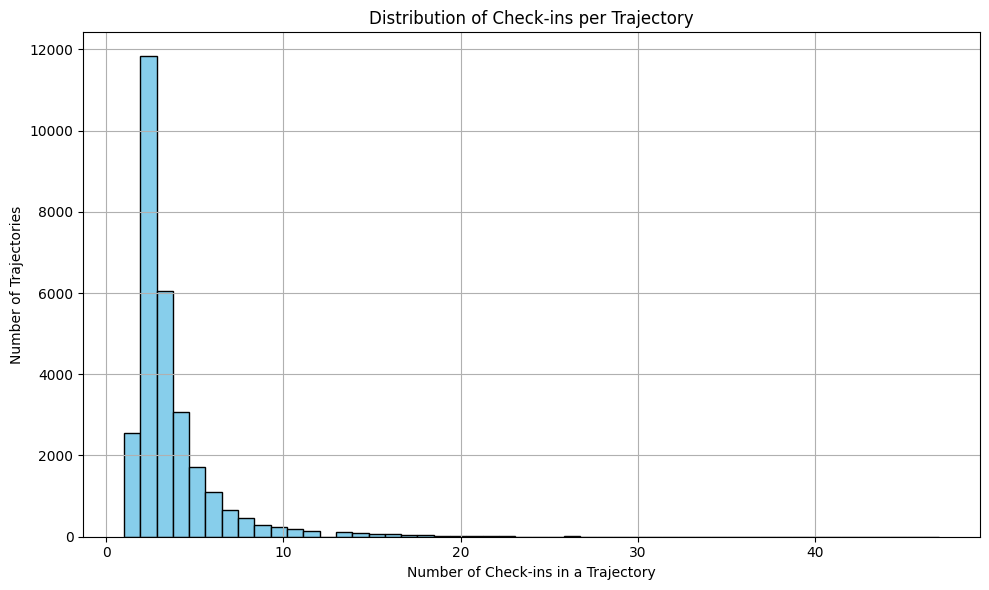

In [15]:
get_trajectory_checkin_stats(nyc_train)

총 trajectory 수: 77276
평균 check-in 수: 4.1554
최소 check-in 수: 1
최대 check-in 수: 76
표준편차: 3.3556


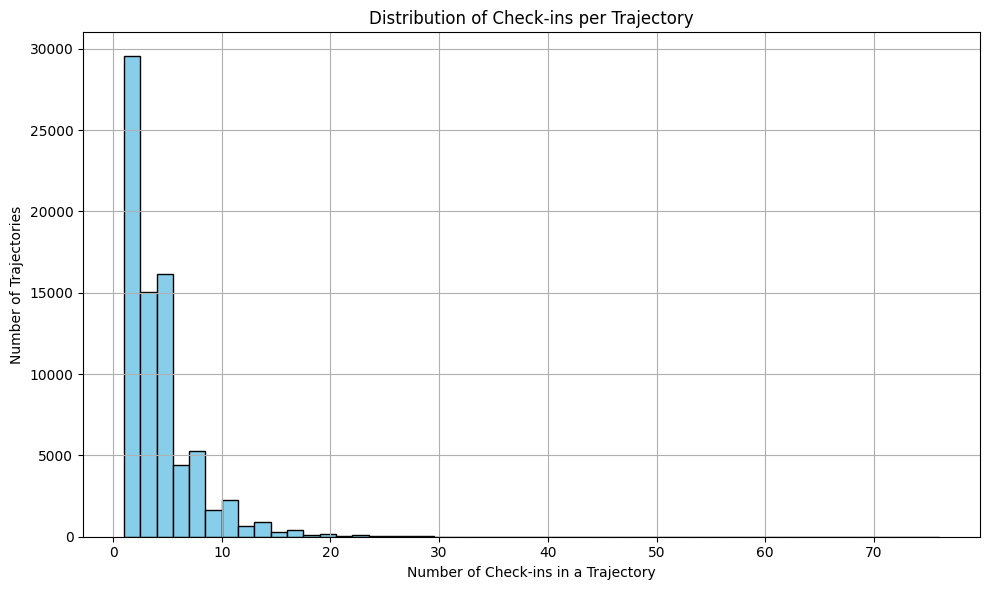

In [16]:
get_trajectory_checkin_stats(tky_train)

In [17]:
import matplotlib.pyplot as plt

def plot_user_checkin_stats(user_stats_df, bins=30):
    """
    사용자별 check-in 통계 (총 check-in 수, 활동 일수, 하루 평균 check-in 수)를 시각화합니다.
    
    Parameters:
    - user_stats_df: DataFrame, 'total_checkins', 'active_days', 'avg_checkins_per_day' 열을 포함해야 함
    - bins: int, 히스토그램의 bin 개수
    """
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))

    # 총 check-in 수
    axs[0].hist(user_stats_df['total_checkins'], bins=bins, edgecolor='black')
    axs[0].set_title('Total Check-ins per User')
    axs[0].set_xlabel('Total Check-ins')
    axs[0].set_ylabel('Number of Users')

    # 활동 일수
    axs[1].hist(user_stats_df['active_days'], bins=bins, edgecolor='black', color='orange')
    axs[1].set_title('Active Days per User')
    axs[1].set_xlabel('Active Days')
    axs[1].set_ylabel('Number of Users')

    # 하루 평균 check-in 수
    axs[2].hist(user_stats_df['avg_checkins_per_day'], bins=bins, edgecolor='black', color='green')
    axs[2].set_title('Avg. Daily Check-ins per User')
    axs[2].set_xlabel('Avg. Check-ins per Day')
    axs[2].set_ylabel('Number of Users')

    plt.tight_layout()
    plt.show()


,UserId,total_checkins,active_days,avg_checkins_per_day
0,1,27,18,1.500000
1,2,48,25,1.920000
2,3,22,12,1.833333
3,4,52,34,1.529412
4,5,66,32,2.062500
...,...,...,...,...
1067,1078,56,39,1.435897
1068,1079,88,42,2.095238
1069,1080,57,33,1.727273
1070,1082,194,32,6.062500


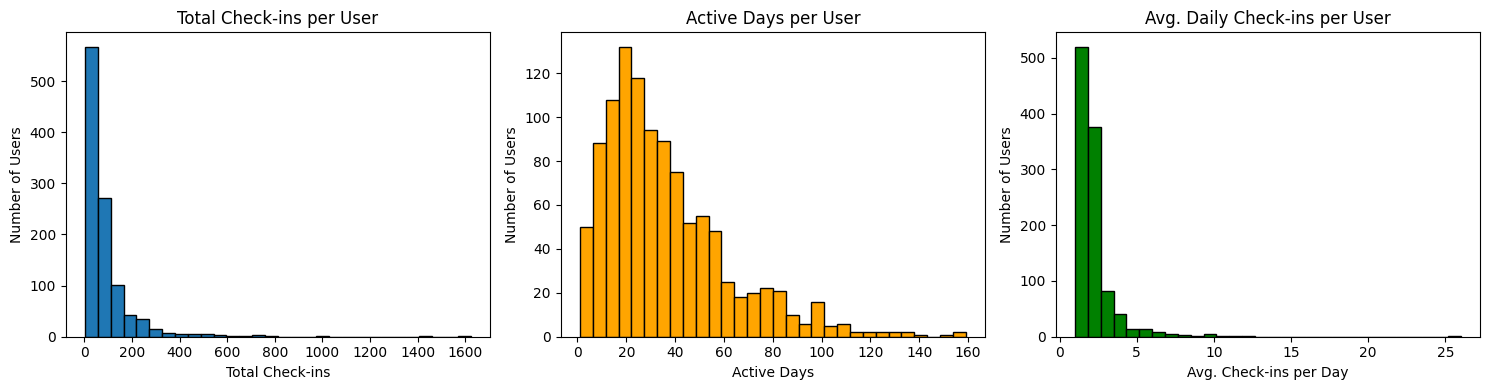

count    1072.000000
mean        2.226332
std         1.436245
min         1.000000
25%         1.567342
50%         1.850743
75%         2.296627
max        26.000000
Name: avg_checkins_per_day, dtype: float64


In [22]:
display(avg_user_check_in_nyc)

plot_user_checkin_stats(avg_user_check_in_nyc)

print( avg_user_check_in_nyc['avg_checkins_per_day'].describe()  )

In [20]:
# display(avg_user_check_in_ca)
# plot_user_checkin_stats(avg_user_check_in_ca)

,UserId,total_checkins,active_days,avg_checkins_per_day
0,1,83,12,6.916667
1,2,120,62,1.935484
2,3,101,38,2.657895
3,4,100,71,1.408451
4,5,160,42,3.809524
...,...,...,...,...
2276,2289,74,25,2.960000
2277,2290,189,82,2.304878
2278,2291,45,31,1.451613
2279,2292,69,40,1.725000


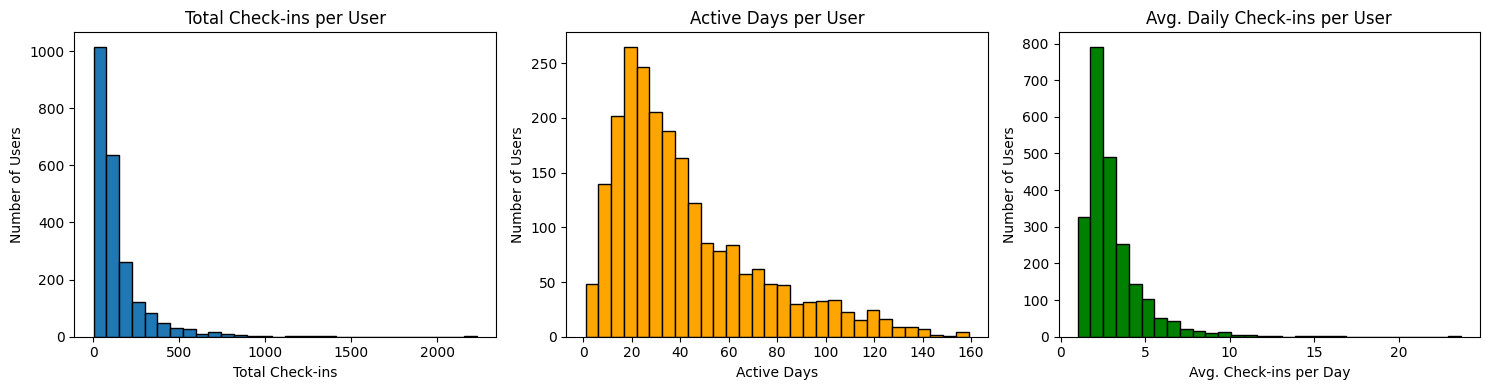

count    2281.000000
mean        3.054784
std         1.748931
min         1.000000
25%         1.967742
50%         2.538462
75%         3.519231
max        23.687500
Name: avg_checkins_per_day, dtype: float64


In [23]:
display(avg_user_check_in_tky)
plot_user_checkin_stats(avg_user_check_in_tky)

print( avg_user_check_in_tky['avg_checkins_per_day'].describe()  )  

In [ ]:
# POI별 하루 평균 check-in 수 확인
def get_avg_daily_checkin_per_poi(df):
    # 1. datetime 형식 변환
    df['UTCTimeOffset'] = pd.to_datetime(df['UTCTimeOffset'])

    # 2. 날짜 정보 추출
    df['date'] = df['UTCTimeOffset'].dt.date

    # 3. POI별 전체 check-in 수 계산
    total_checkins = df.groupby('PoiId').size().reset_index(name='total_checkins')

    # 4. POI별 check-in이 발생한 고유 날짜 수 계산
    active_days = df.groupby('PoiId')['date'].nunique().reset_index(name='active_days')

    # 5. 평균 check-in 계산
    poi_avg_checkins = pd.merge(total_checkins, active_days, on='PoiId')
    poi_avg_checkins['avg_checkins_per_day'] = poi_avg_checkins['total_checkins'] / poi_avg_checkins['active_days']

    return poi_avg_checkins


avg_poi_check_in_nyc = get_avg_daily_checkin_per_poi(nyc_train)
avg_poi_check_in_ca = get_avg_daily_checkin_per_poi(ca_train)
avg_poi_check_in_tky = get_avg_daily_checkin_per_poi(tky_train)


In [ ]:
import matplotlib.pyplot as plt

def plot_poi_checkin_stats(poi_stats_df, bins=30, quantile_threshold=0.99):
    """
    POI별 check-in 통계 (총 check-in 수, 활성 일수)를 시각화합니다.
    너무 큰 값은 제외하여 분포를 보기 쉽게 조정합니다.

    Parameters:
    - poi_stats_df: DataFrame, 'total_checkins', 'active_days' 열 포함
    - bins: int, 히스토그램 bin 개수
    - quantile_threshold: float, 상위 제외할 비율 (예: 0.99면 상위 1% 제외)
    """
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # 1. Total Check-ins (상위 outlier 제거)
    max_checkin = poi_stats_df['total_checkins'].quantile(quantile_threshold)
    filtered_total = poi_stats_df[poi_stats_df['total_checkins'] <= max_checkin]['total_checkins']

    axs[0].hist(filtered_total, bins=bins, edgecolor='black')
    axs[0].set_title(f'Total Check-ins per POI (<= {int(max_checkin)})')
    axs[0].set_xlabel('Total Check-ins')
    axs[0].set_ylabel('Number of POIs')

    # 2. Active Days
    axs[1].hist(poi_stats_df['active_days'], bins=bins, edgecolor='black', color='orange')
    axs[1].set_title('Active Days per POI')
    axs[1].set_xlabel('Active Days')
    axs[1].set_ylabel('Number of POIs')

    plt.tight_layout()
    plt.show()


,PoiId,total_checkins,active_days,avg_checkins_per_day
0,3fd66200f964a52000e71ee3,7,5,1.4
1,3fd66200f964a52001e81ee3,6,5,1.2
2,3fd66200f964a52003e71ee3,6,6,1.0
3,3fd66200f964a52004e41ee3,11,11,1.0
4,3fd66200f964a52004e61ee3,7,7,1.0
...,...,...,...,...
4975,5095afaae4b0147d2e0cb6e3,2,2,1.0
4976,5096fbd1e4b076702db1e6f1,2,2,1.0
4977,509817afc84c2e276bc2cd1f,16,1,16.0
4978,50988e54e4b0fd23874c1700,14,2,7.0


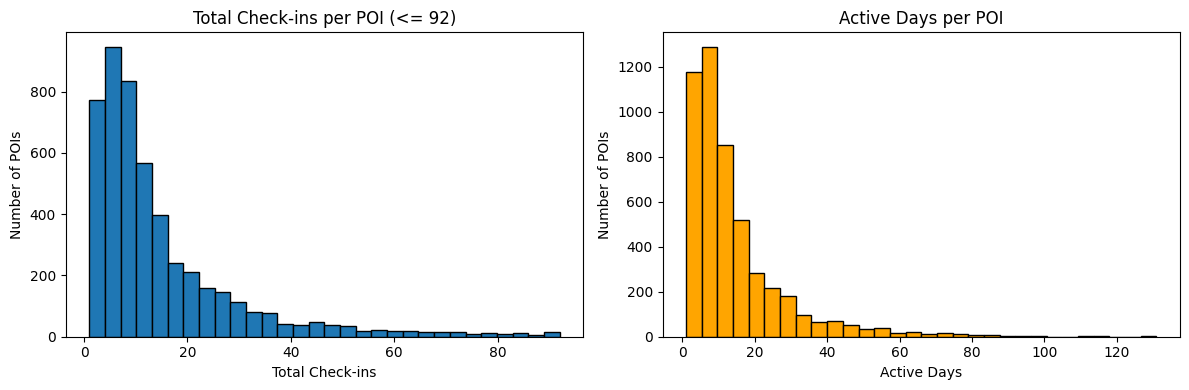

In [ ]:
display(avg_poi_check_in_nyc)
plot_poi_checkin_stats(avg_poi_check_in_nyc)

,PoiId,total_checkins,active_days,avg_checkins_per_day
0,8947,346,185,1.870270
1,9069,42,38,1.105263
2,9071,27,24,1.125000
3,9120,40,32,1.250000
4,9122,26,24,1.083333
...,...,...,...,...
12246,2499843,2,2,1.000000
12247,2500501,2,2,1.000000
12248,2500795,2,2,1.000000
12249,2501613,2,2,1.000000


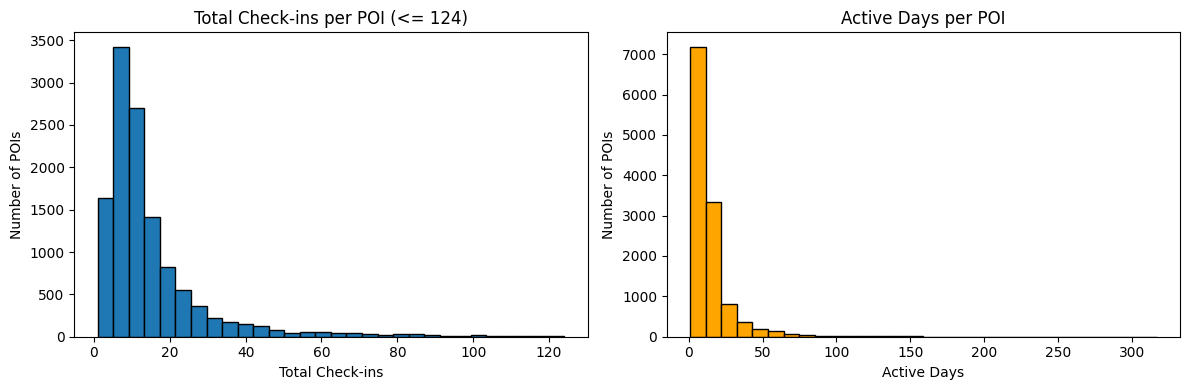

In [ ]:
display(avg_poi_check_in_ca)
plot_poi_checkin_stats(avg_poi_check_in_ca)

,PoiId,total_checkins,active_days,avg_checkins_per_day
0,4b058799f964a5208b9b22e3,11,10,1.100000
1,4b058799f964a5208d9b22e3,19,16,1.187500
2,4b058799f964a520929b22e3,6,6,1.000000
3,4b058799f964a520959b22e3,19,18,1.055556
4,4b058799f964a520979b22e3,20,18,1.111111
...,...,...,...,...
7187,50b9f006e4b09b57e747fc8d,4,4,1.000000
7188,50ba15e1e4b0cbe642206289,1,1,1.000000
7189,50bcb364e4b03830336d538f,5,4,1.250000
7190,50bfd199498e2bfc141a8ca6,2,1,2.000000


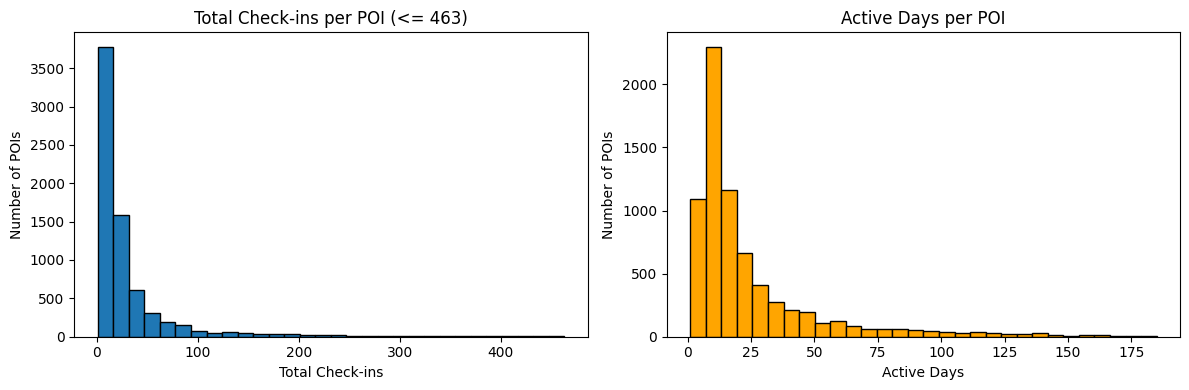

In [ ]:
display(avg_poi_check_in_tky)
plot_poi_checkin_stats(avg_poi_check_in_tky)

# 지역 기반 EDA

In [ ]:
def assign_time_period(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

def assign_timezone(df):
    df['hour'] = pd.to_datetime(df['UTCTimeOffset']).dt.hour
    df['time_period'] = df['hour'].apply(assign_time_period)
    return df

def geohash_to_polygon(gh):
    """Geohash를 Polygon 영역으로 변환"""
    lat, lon, lat_err, lon_err = geohash2.decode_exactly(gh)
    lat_min, lat_max = lat - lat_err, lat + lat_err
    lon_min, lon_max = lon - lon_err, lon + lon_err
    return Polygon([
        (lon_min, lat_min), (lon_min, lat_max),
        (lon_max, lat_max), (lon_max, lat_min),
        (lon_min, lat_min)
    ])

def df_to_geohash_gdf(df, lat_col='Latitude', lon_col='Longitude', precision=6):
    """POI 위치를 geohash로 매핑하고 이를 GeoDataFrame으로 변환"""
    df['geohash'] = df.apply(lambda row: geohash2.encode(row[lat_col], row[lon_col], precision=precision), axis=1)

    geohash_counts = df['geohash'].value_counts().reset_index()
    geohash_counts.columns = ['geohash', 'count']

    geohash_counts['geometry'] = geohash_counts['geohash'].apply(geohash_to_polygon)
    gdf = gpd.GeoDataFrame(geohash_counts, geometry='geometry', crs='EPSG:4326')
    return gdf

def get_time_gdf(df):

    df = assign_timezone(df)

    # 시간대별 데이터프레임 분리
    df_morning = df.loc[df['time_period'] == 'morning']
    df_afternoon = df.loc[df['time_period'] == 'afternoon']
    df_evening = df.loc[df['time_period'] == 'evening']
    df_night = df.loc[df['time_period'] == 'night']

    # 각각 geohash 기반 gdf로 변환
    gdf_morning = df_to_geohash_gdf(df_morning)
    gdf_afternoon = df_to_geohash_gdf(df_afternoon)
    gdf_evening = df_to_geohash_gdf(df_evening)
    gdf_night = df_to_geohash_gdf(df_night)

    return gdf_morning, gdf_afternoon, gdf_evening, gdf_night


In [ ]:
nyc_gdf_morning, nyc_gdf_afternoon, nyc_gdf_evening, nyc_gdf_night = get_time_gdf(nyc_train)
ca_gdf_morning, ca_gdf_afternoon, ca_gdf_evening, ca_gdf_night = get_time_gdf(ca_train)
tky_gdf_morning, tky_gdf_afternoon, tky_gdf_evening, tky_gdf_night = get_time_gdf(tky_train)

/tmp/ipykernel_2501296/3435109235.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geohash'] = df.apply(lambda row: geohash2.encode(row[lat_col], row[lon_col], precision=precision), axis=1)
/tmp/ipykernel_2501296/3435109235.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geohash'] = df.apply(lambda row: geohash2.encode(row[lat_col], row[lon_col], precision=precision), axis=1)
/tmp/ipykernel_2501296/3435109235.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [ ]:
nyc_gdf_morning

,geohash,count,geometry
0,dr5ru7,944,"POLYGON ((-73.99292 40.75378, -73.99292 40.759..."
1,dr5ru2,932,"POLYGON ((-73.99292 40.73730, -73.99292 40.742..."
2,dr5ru3,851,"POLYGON ((-73.99292 40.74280, -73.99292 40.748..."
3,dr5rud,840,"POLYGON ((-73.98193 40.74829, -73.98193 40.753..."
4,dr5ru6,833,"POLYGON ((-73.99292 40.74829, -73.99292 40.753..."
...,...,...,...
979,dr72uq,1,"POLYGON ((-73.99292 40.94604, -73.99292 40.951..."
980,dr5qzg,1,"POLYGON ((-73.83911 40.57800, -73.83911 40.583..."
981,dr5xcs,1,"POLYGON ((-73.76221 40.75928, -73.76221 40.764..."
982,dr72qe,1,"POLYGON ((-73.89404 40.84167, -73.89404 40.847..."


In [ ]:
# 지도 시각화
Map(Layer(nyc_gdf_morning,
            color_continuous_style('count', palette='Peach')))

In [ ]:
# 지도 시각화
Map(Layer(nyc_gdf_afternoon,
            color_continuous_style('count', palette='Peach')))

In [ ]:
# 지도 시각화
Map(Layer(nyc_gdf_evening,
            color_continuous_style('count', palette='Peach')))

In [ ]:
# 지도 시각화
Map(Layer(nyc_gdf_night,
            color_continuous_style('count', palette='Peach')))